# $k$-Means Clustering

In this notebook, we introduce the concept of $k$-Means Clustering method, then apply it on the palm penguins dataset.

---

## Introduction
**K-Means Clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. 

---

## Algorithm

$k$-Means clustering algorithm uses an iterative technique to group unlabeled data into $k$ clusters based on cluster centers (centroids). The data in each cluster are chosen such that their average distance to their respective centroid is minimized. 

First, we randomly place $k$ centroids $m_1^{(1)}, \dots, m_k^{(1)}$ for the initial cluster. Then the algorithm proceeds by alternating between following two steps:

* **Assignment Step:** Assign each observation to the cluster with the nearest mean: that with the least squared Euclidean distance.
$$
S_i^{(t)} = \left\{ x_p: \|x_p - m_i^{(t)}\|^2 \le \|x_p - m_j^{(t)}\|^2, \forall j,\, j = 1,\dots,k \right\},
$$
where each $x_p$ is assigned to exactly one $S^{(t)}$, even if it could be assigned to two or more of them.

* **Update Step:** Recalculate means (centroids) for observations assigned to each cluster.
$$
m_i^{(t+1)} = \frac1{\left|S_i^{(t)}\right|} \sum_{x_j \in S_i^{(t)}} x_j.
$$

The algorithm has converged when the assignments no longer change.


## Implementation

In this part, we will implement the K-Means clustering on the palm penguins dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

df = pd.read_csv("./Datasets/palmer_penguins.csv")

X = df[["bill_length_mm", "bill_depth_mm"]].values
y = df.island.values
y[y == 'Torgersen'] = 0
y[y == 'Biscoe'] = 1
y[y == 'Dream'] = 2

In [2]:
# four centers, four colors

def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    else:
        return "blue"

c = [colors(label) for label in y]

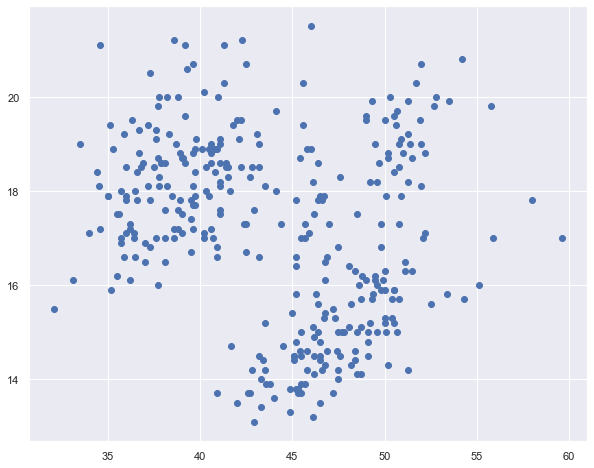

In [3]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
# PCA clustering

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [5]:
centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

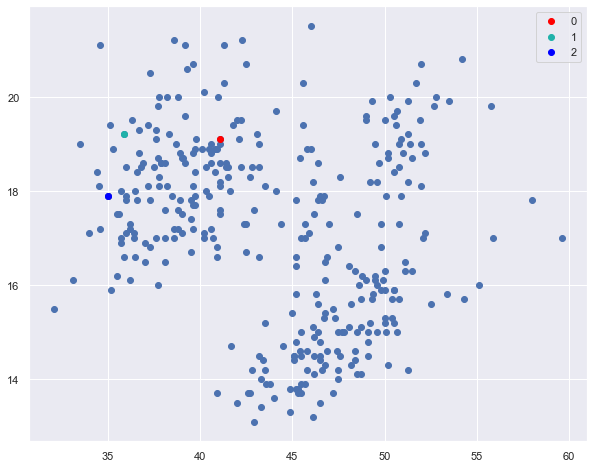

In [6]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "blue", label = centers[2][2])
plt.legend()
plt.show()

In [7]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [8]:
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [9]:
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

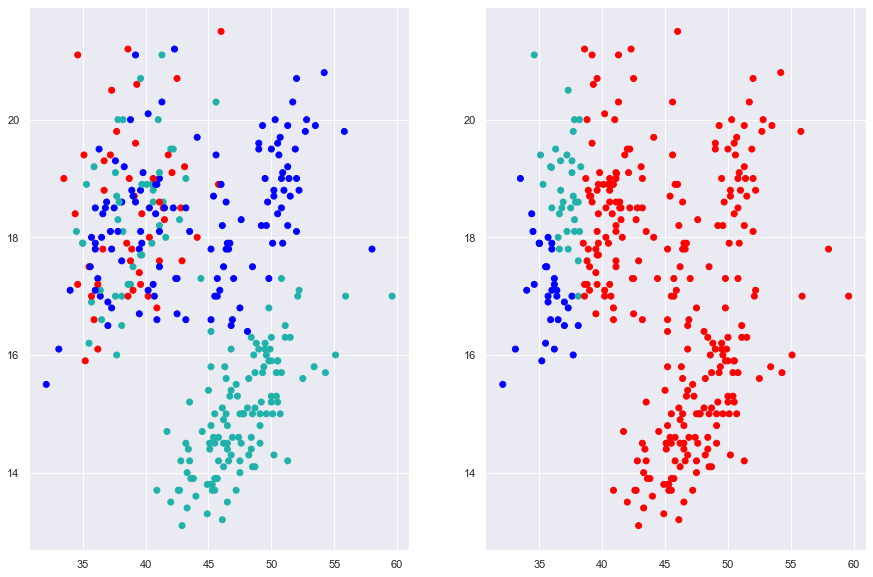

In [10]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "blue", label = centers[2][2])

plt.show()

In [11]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

In [12]:
new_centers = update_centers(X, centers)

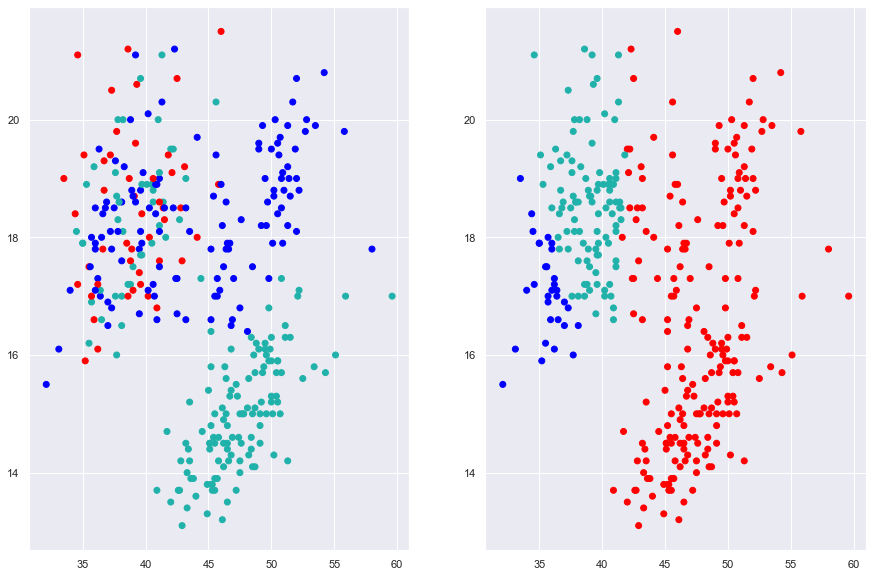

In [13]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)


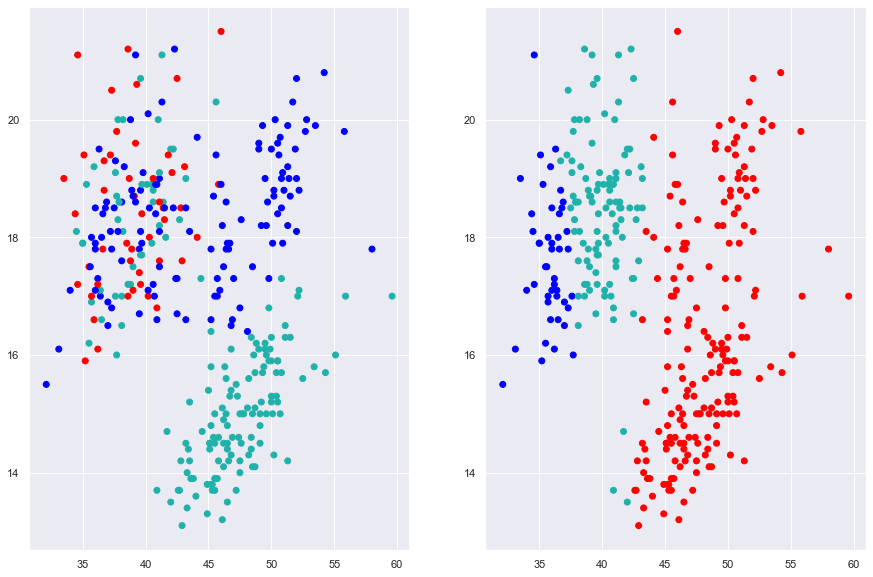

In [14]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

In [15]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers
    

In [16]:
centers = k_means_clustering(X, 2)

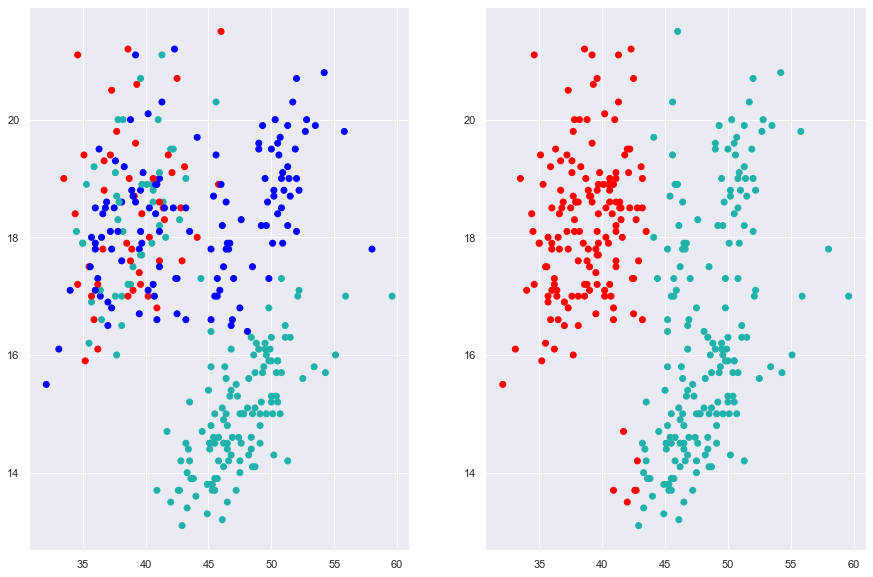

In [17]:
centers = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()